In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.options.display.max_columns = 999

In [2]:
# Load the business dataframe
df = pd.read_csv('yelp_restaurants.csv')

In [3]:
df.head()

,is_open,business_id,name,stars,review_count,categories,attributes.RestaurantsTableService,attributes.WiFi,attributes.BikeParking,attributes.BusinessAcceptsCreditCards,attributes.RestaurantsReservations,attributes.WheelchairAccessible,attributes.Caters,attributes.OutdoorSeating,attributes.RestaurantsGoodForGroups,attributes.HappyHour,attributes.RestaurantsPriceRange2,attributes.HasTV,attributes.Alcohol,attributes.DogsAllowed,attributes.RestaurantsTakeOut,attributes.NoiseLevel,attributes.RestaurantsAttire,attributes.RestaurantsDelivery,attributes.GoodForKids,attributes.garage,attributes.street,attributes.validated,attributes.lot,attributes.valet,attributes.touristy,attributes.hipster,attributes.romantic,attributes.divey,attributes.intimate,attributes.trendy,attributes.upscale,attributes.classy,attributes.casual,attributes.dessert,attributes.latenight,attributes.lunch,attributes.dinner,attributes.brunch,attributes.breakfast
0,1,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,"Gastropubs, Food, Beer Gardens, Restaurants, B...",True,'free',True,True,False,True,True,True,True,True,2,True,'beer_and_wine',False,True,'average','casual',Not listed,Not listed,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,4.0,126,"Salad, Soup, Sandwiches, Delis, Restaurants, C...",Not listed,'free',False,True,False,Not listed,True,False,False,Not listed,2,False,'beer_and_wine',Not listed,True,'average','casual',False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True
2,1,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3.5,169,"Restaurants, Thai",Not listed,'no',True,Not listed,True,Not listed,False,False,True,Not listed,2,False,'Not listed',False,True,'average','casual',True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False
3,1,jFYIsSb7r1QeESVUnXPHBw,Boxwood Biscuit,4.5,11,"Breakfast & Brunch, Restaurants",Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed
4,1,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,4.0,39,"Food, Pizza, Restaurants",False,'free',True,True,False,True,True,True,True,Not listed,2,True,'Not listed',True,True,'average','casual',True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,Not listed,Not listed,Not listed,Not listed,Not listed,Not listed


# Open vs. Closed Star Ratings and Review Counts

### Star Ratings

In [4]:
# Copy dataframe for plotting
df_stars = df[['is_open', 'stars', 'review_count']].copy()
df_stars['stars_count'] = 1
df_stars = df_stars.groupby(['is_open', 'stars']).agg({'review_count':'sum', 'stars_count':'sum'}).reset_index()

# Replace 0 with 'Closed' and 1 with 'Open' in the 'is_open' column
df_stars['is_open'].replace({0:'Closed', 1:'Open'}, inplace=True)

df_stars

,is_open,stars,review_count,stars_count
0,Closed,1.0,431,45
1,Closed,1.5,4518,230
2,Closed,2.0,20616,810
3,Closed,2.5,81786,1983
4,Closed,3.0,226483,4158
5,Closed,3.5,418883,5683
6,Closed,4.0,412810,5307
7,Closed,4.5,154925,2668
8,Closed,5.0,11781,544
9,Open,1.0,2928,155


In [5]:
# Set up plotting style
sns.set(color_codes=True)
plt.style.use('ggplot')

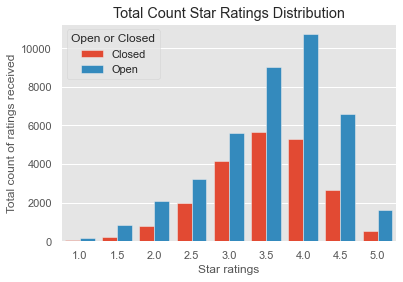

In [6]:
# Plot total number of star ratings received by both open and closed restaurants.
sns.barplot(x='stars', y='stars_count', hue='is_open', data=df_stars, saturation=1)
plt.xlabel('Star ratings')
plt.ylabel('Total count of ratings received')
plt.title('Total Count Star Ratings Distribution')
plt.legend(title='Open or Closed')
plt.show()

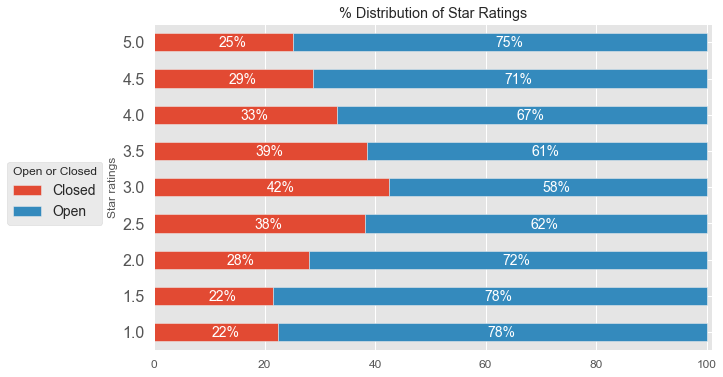

In [7]:
# Set up dataframe for stacked bar chart graph
dummy = pd.crosstab(index=df_stars['stars'], columns=df_stars['is_open'], values=df_stars['stars_count'], aggfunc='sum')
dummy['Total'] = dummy['Closed'] + dummy['Open']
dummy['Closed'] = round(((dummy['Closed'] / dummy['Total']) * 100), 1)
dummy['Open'] = round(((dummy['Open'] / dummy['Total']) * 100), 1)
dummy.drop('Total', axis=1, inplace=True)

# Plot
ax = dummy.plot(kind='barh', stacked=True, figsize=(10,6))

# Percent annotation inside bar
for p in ax.patches:
    if p.get_width() == 0:
        pass
    else:
        ax.annotate('%.0f' % p.get_width() + '%', (p.get_x() + p.get_width() / 2, p.get_y()), xytext=(-5, 4), textcoords='offset points',
                   color='white', fontsize=14)

ax.legend(bbox_to_anchor=(-0.08, 0.6), title='Open or Closed', fontsize=14)
plt.yticks(fontsize=16)
plt.xticks(fontsize=12)
plt.xlim(0, 101)
plt.ylabel('Star ratings')
plt.title('% Distribution of Star Ratings')
plt.show()

### Review Counts

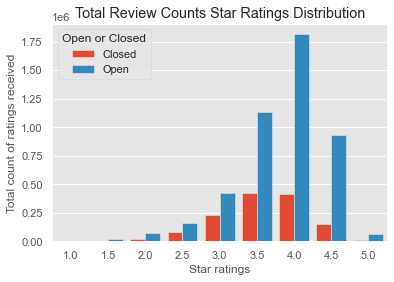

In [8]:
# Plot total number of star ratings received by both open and closed restaurants
sns.barplot(x='stars', y='review_count', hue='is_open', data=df_stars, saturation=1)
plt.xlabel('Star ratings')
plt.ylabel('Total count of ratings received')
plt.title('Total Review Counts Star Ratings Distribution')
plt.legend(title='Open or Closed')
plt.show()

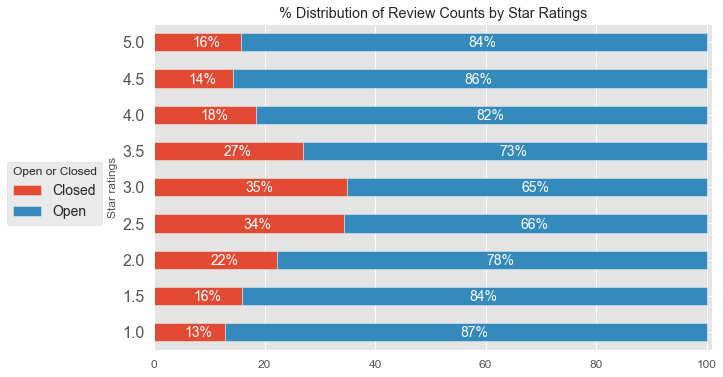

In [9]:
# Set up dataframe for stacked bar chart graph
dummy = pd.crosstab(index=df_stars['stars'], columns=df_stars['is_open'], values=df_stars['review_count'], aggfunc='sum')
dummy['Total'] = dummy['Closed'] + dummy['Open']
dummy['Closed'] = round(((dummy['Closed'] / dummy['Total']) * 100), 1)
dummy['Open'] = round(((dummy['Open'] / dummy['Total']) * 100), 1)
dummy.drop('Total', axis=1, inplace=True)

# Plot
ax = dummy.plot(kind='barh', stacked=True, figsize=(10,6))

# Percent annotation inside bar
for p in ax.patches:
    if p.get_width() == 0:
        pass
    else:
        ax.annotate('%.0f' % p.get_width() + '%', (p.get_x() + p.get_width() / 2, p.get_y()), xytext=(-5, 4), textcoords='offset points',
                   color='white', fontsize=14)

ax.legend(bbox_to_anchor=(-0.08, 0.6), title='Open or Closed', fontsize=14)
plt.yticks(fontsize=16)
plt.xticks(fontsize=12)
plt.xlim(0, 101)
plt.ylabel('Star ratings')
plt.title('% Distribution of Review Counts by Star Ratings')
plt.show()

# Who are the top 5 restaurant chains?

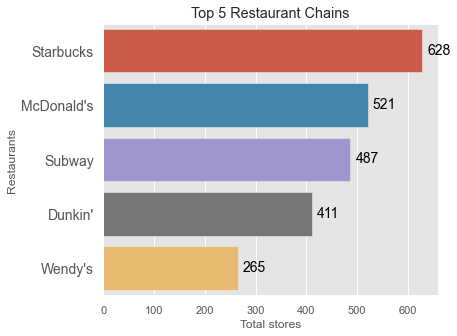

In [10]:
# Top 5 restaurant chains
dummy = df['name'].value_counts().sort_values(ascending=False).head()
dummy = pd.DataFrame(data={'Restaurants':dummy.index, 'Count':dummy.values})
plt.figure(figsize=(6, 5))
ax = sns.barplot(x='Count', y='Restaurants', data=dummy)

# Annotate bar
for p in ax.patches:
    if p.get_width() == 0:
        pass
    else:
        ax.annotate('%.0f' % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, -25), textcoords='offset points',
                   color='black', fontsize=14)

plt.xlabel('Total stores')
plt.title('Top 5 Restaurant Chains')
plt.yticks(fontsize=14)
plt.show()

# What are the top 10 appearing words in the 'categories' for both open and closed restaurants?

In [11]:
df_topten_cat = df['categories'].str.split(',', expand=True)
df_topten_cat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,Gastropubs,Food,Beer Gardens,Restaurants,Bars,American (Traditional),Beer Bar,Nightlife,Breweries,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Salad,Soup,Sandwiches,Delis,Restaurants,Cafes,Vegetarian,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,Restaurants,Thai,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,Breakfast & Brunch,Restaurants,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Food,Pizza,Restaurants,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [12]:
# Replace NaN with 'None' in all the columns
df_topten_cat.fillna('None', inplace=True)

In [13]:
# Remove empty spaces from all of values in the columns
for col in df_topten_cat.columns:
    df_topten_cat[col] = df_topten_cat[col].str.strip()

In [14]:
# Create a dictionary with the word and count
dict_topten_cat = {}

for col, series in df_topten_cat.items():
    for idx, data in series.items():
        if data in dict_topten_cat:
            dict_topten_cat[data] += 1
        else:
            dict_topten_cat[data] = 1

In [15]:
# Create a dataframe from the dictionary
df_topten_dict = pd.DataFrame.from_dict(dict_topten_cat, orient='index', columns=['Total'])
df_topten_dict.sort_values(by='Total', ascending=False).head(10)

,Total
None,1988942
Restaurants,49816
Food,25346
Nightlife,10649
Bars,10209
Sandwiches,7133
Coffee & Tea,6690
American (Traditional),6510
Pizza,5585
American (New),5440


In [16]:
# Remove 'None' from the rows
df_topten_dict.drop('None', axis=0, inplace=True)
df_topten_dict = df_topten_dict.sort_values(by='Total', ascending=False)
df_topten_dict.head(10)

,Total
Restaurants,49816
Food,25346
Nightlife,10649
Bars,10209
Sandwiches,7133
Coffee & Tea,6690
American (Traditional),6510
Pizza,5585
American (New),5440
Breakfast & Brunch,5427


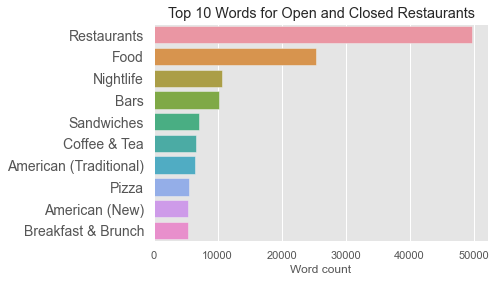

In [17]:
# Plot the Top 10 most appearing words in the categories for both open and closed restaurants
_ = df_topten_dict.head(10).T
sns.barplot(data=_, orient='h')
plt.xlabel('Word count')
plt.title('Top 10 Words for Open and Closed Restaurants')
plt.yticks(fontsize=14)
plt.show()

# What are the top 10 appearing words in the 'categories' for open vs. closed restaurants?

In [18]:
# Create dataframe
df_topten_catdiff = df['categories'].str.split(',', expand=True)

# Replace NaN with 'None' in all the columns
df_topten_catdiff.fillna('None', inplace=True)

# Remove empty spaces from all of values in the columns
for col in df_topten_catdiff.columns:
    df_topten_catdiff[col] = df_topten_catdiff[col].str.strip()

# Insert is_open
df_topten_catdiff['is_open'] = df['is_open'].copy()
    
df_topten_catdiff.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,is_open
0,Gastropubs,Food,Beer Gardens,Restaurants,Bars,American (Traditional),Beer Bar,Nightlife,Breweries,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1
1,Salad,Soup,Sandwiches,Delis,Restaurants,Cafes,Vegetarian,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1
2,Restaurants,Thai,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1
3,Breakfast & Brunch,Restaurants,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1
4,Food,Pizza,Restaurants,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1


In [19]:
# Create dataframes for both closed and open
df_topten_closed = df_topten_catdiff.loc[df_topten_catdiff.is_open == 0].drop('is_open', axis=1)
df_topten_open = df_topten_catdiff.loc[df_topten_catdiff.is_open == 1].drop('is_open', axis=1)

In [20]:
# Create a dictionary with the word and count for the closed restaurants
dict_topten_closed = {}

for col, series in df_topten_closed.items():
    for idx, data in series.items():
        if data in dict_topten_closed:
            dict_topten_closed[data] += 1
        else:
            dict_topten_closed[data] = 1

In [21]:
# Create a dictionary with the word and count for the open restaurants
dict_topten_open = {}

for col, series in df_topten_open.items():
    for idx, data in series.items():
        if data in dict_topten_open:
            dict_topten_open[data] += 1
        else:
            dict_topten_open[data] = 1

In [22]:
# Create a dictionary from the dictionary of the closed restaurants
df_topten_dict_closed = pd.DataFrame.from_dict(dict_topten_closed, orient='index', columns=['Total'])
df_topten_dict_closed.drop('None', axis=0, inplace=True)
df_topten_dict_closed = df_topten_dict_closed.sort_values(by='Total', ascending=False)
df_topten_dict_closed.head(10)

,Total
Restaurants,18347
Food,7886
Nightlife,3683
Bars,3483
Sandwiches,2420
American (New),2196
American (Traditional),2143
Coffee & Tea,1932
Pizza,1788
Breakfast & Brunch,1607


In [23]:
# Create a dictionary from the dictionary of the open restaurants
df_topten_dict_open = pd.DataFrame.from_dict(dict_topten_open, orient='index', columns=['Total'])
df_topten_dict_open.drop('None', axis=0, inplace=True)
df_topten_dict_open = df_topten_dict_open.sort_values(by='Total', ascending=False)
df_topten_dict_open.head(10)

,Total
Restaurants,31469
Food,17460
Nightlife,6966
Bars,6726
Coffee & Tea,4758
Sandwiches,4713
American (Traditional),4367
Fast Food,4263
Breakfast & Brunch,3820
Pizza,3797


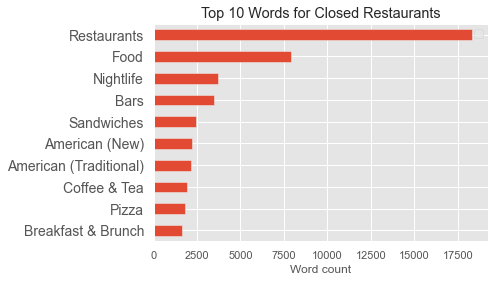

In [24]:
# Plot the top 10 most appearing words in the categories for the closed restaurants
df_topten_dict_closed.head(10).sort_values(by='Total', ascending=True).plot(kind='barh')
plt.xlabel('Word count')
plt.title('Top 10 Words for Closed Restaurants')
plt.legend('')
plt.yticks(fontsize=14)
plt.show()

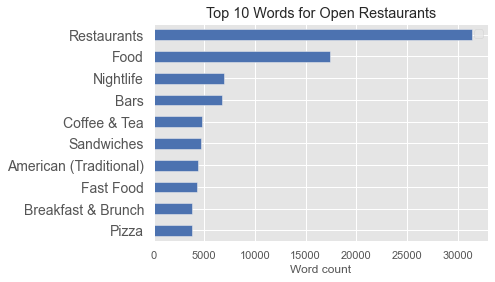

In [25]:
# Plot the top 10 most appearing words in the categories for the open restaurants
df_topten_dict_open.head(10).sort_values(by='Total', ascending=True).plot(kind='barh', color='b')
plt.xlabel('Word count')
plt.title('Top 10 Words for Open Restaurants')
plt.legend('')
plt.yticks(fontsize=14)
plt.show()

Compare the percentage (word count per restaurant) of the top appearing words for open vs. closed restaurants.

In [26]:
# List of open index in array
open_cat_values = df_topten_dict_open.head(10).index.values
open_cat_values

array(['Restaurants', 'Food', 'Nightlife', 'Bars', 'Coffee & Tea',
       'Sandwiches', 'American (Traditional)', 'Fast Food',
       'Breakfast & Brunch', 'Pizza'], dtype=object)

In [27]:
# Filter df_topten_dict_closed to have open_cat_values
df_closed_top = df_topten_dict_closed[df_topten_dict_closed.index.isin(open_cat_values)]

# Calculate how frequent certain words appear out of all the closed restaurants
df_closed_top = pd.concat([df_topten_dict_closed.head(10), df_closed_top]).drop_duplicates()
df_closed_top = (df_closed_top / len(df[df['is_open'] == 0])) * 100
df_closed_top.reset_index(inplace=True)
df_closed_top

,index,Total
0,Restaurants,85.621617
1,Food,36.802315
2,Nightlife,17.187792
3,Bars,16.254433
4,Sandwiches,11.293634
5,American (New),10.248273
6,American (Traditional),10.000933
7,Coffee & Tea,9.016240
8,Pizza,8.344223
9,Breakfast & Brunch,7.499533


In [28]:
# List of closed index in array
closed_cat_values = df_topten_dict_closed.head(10).reset_index()['index'].values
closed_cat_values

array(['Restaurants', 'Food', 'Nightlife', 'Bars', 'Sandwiches',
       'American (New)', 'American (Traditional)', 'Coffee & Tea',
       'Pizza', 'Breakfast & Brunch'], dtype=object)

In [29]:
# Filter df_topten_dict_open to have closed_cat_values
df_open_top = df_topten_dict_open.loc[df_topten_dict_open.index.isin(closed_cat_values)]

# Calculate how frequent certain words appear out of all the open restaurants
df_open_top = pd.concat([df_topten_dict_open.head(10), df_open_top]).drop_duplicates()
df_open_top = (df_open_top / len(df[df['is_open'] == 1])) * 100
df_open_top.reset_index(inplace=True)
df_open_top

,index,Total
0,Restaurants,78.869674
1,Food,43.759398
2,Nightlife,17.458647
3,Bars,16.857143
4,Coffee & Tea,11.924812
5,Sandwiches,11.812030
6,American (Traditional),10.944862
7,Fast Food,10.684211
8,Breakfast & Brunch,9.573935
9,Pizza,9.516291


In [30]:
# Merge df_closed_top and df_open_top
df_closed_open_top = pd.merge(df_closed_top, df_open_top, on=['index'], suffixes=('_closed', '_open'))
df_closed_open_top.rename(columns={'index': 'category', 'Total_closed' : 'Closed', 'Total_open' : 'Open'}, inplace=True)
df_closed_open_top

,category,Closed,Open
0,Restaurants,85.621617,78.869674
1,Food,36.802315,43.759398
2,Nightlife,17.187792,17.458647
3,Bars,16.254433,16.857143
4,Sandwiches,11.293634,11.812030
5,American (New),10.248273,8.130326
6,American (Traditional),10.000933,10.944862
7,Coffee & Tea,9.016240,11.924812
8,Pizza,8.344223,9.516291
9,Breakfast & Brunch,7.499533,9.573935


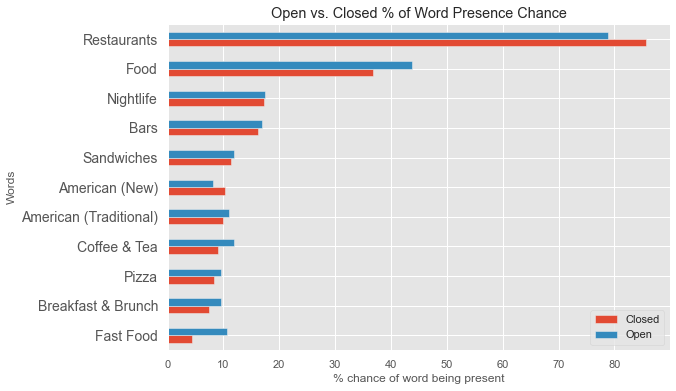

In [31]:
# Plot
df_closed_open_top.set_index('category').sort_values(by=['Closed', 'Open'], ascending=True).plot(kind='barh', figsize=(9, 6))
plt.ylabel('Words')
plt.xlabel('% chance of word being present')
plt.title('Open vs. Closed % of Word Presence Chance')
plt.yticks(fontsize=14)
plt.show()

Closed restaurants categorized themselves as 'Restaurants' more frequent than the open restaurants. Restaurants that categorize themselves as 'Food' and 'Fast Food' are more likely to be open.

# Plot the open vs. closed attribute columns

In [32]:
# Assign attribute column names
attribute_col = [col for col in df.columns if 'attribute' in col]

In [33]:
# Create a dataframe for 'open' and 'closed' restaurants' attributes
df_att_isclosed = df[df['is_open'] == 0][['is_open'] + attribute_col]
df_att_isopen = df[df['is_open'] == 1][['is_open'] + attribute_col]

# Replace 0 and 1 with 'closed' and 'open' respectively
df_att_isclosed.is_open.replace(to_replace=0, value='Closed', inplace=True)
df_att_isopen.is_open.replace(to_replace=1, value='Open', inplace=True)

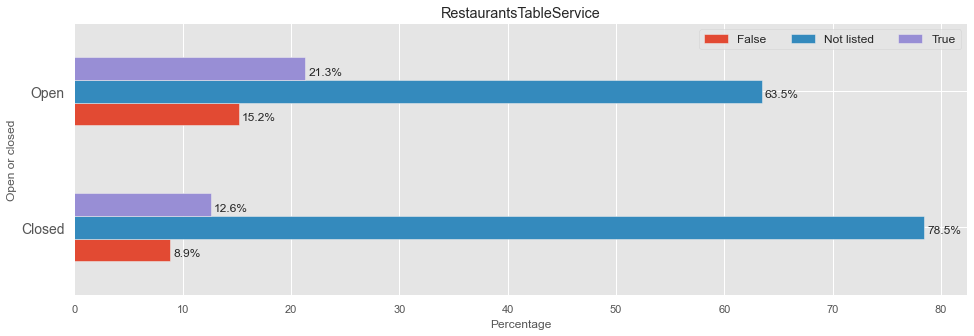

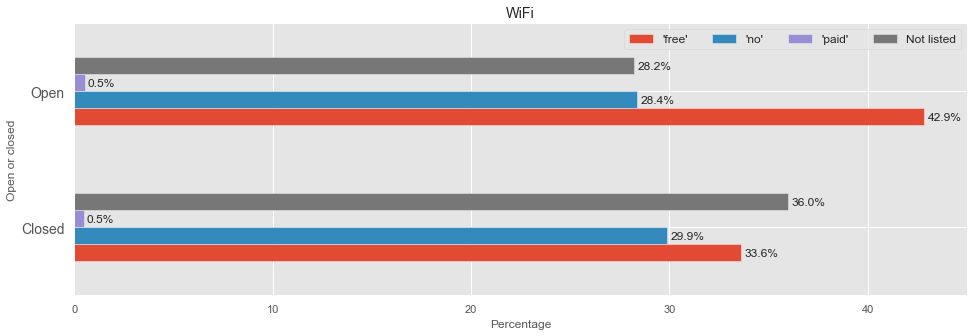

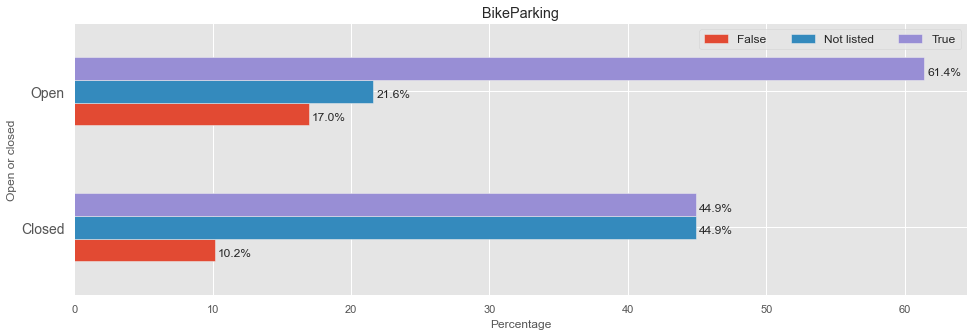

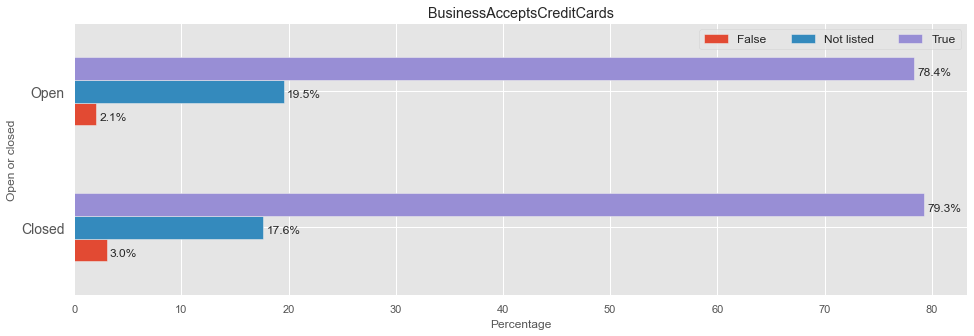

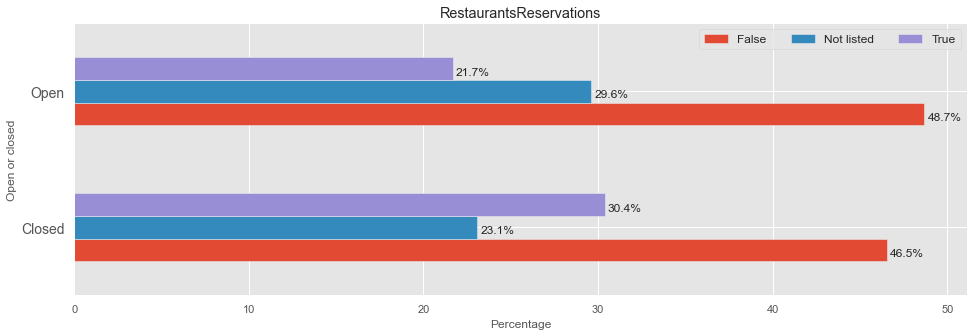

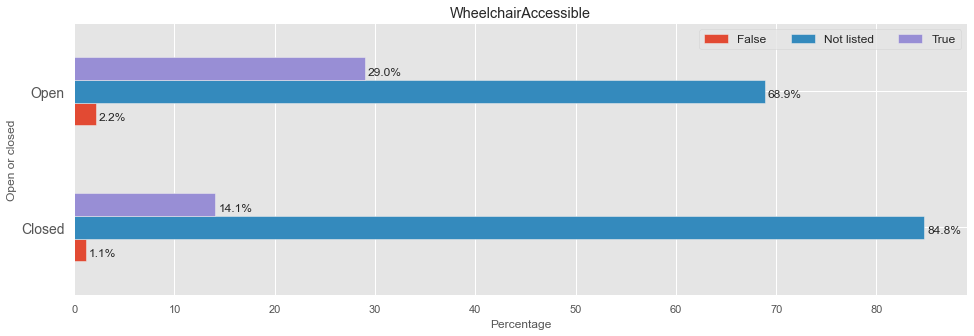

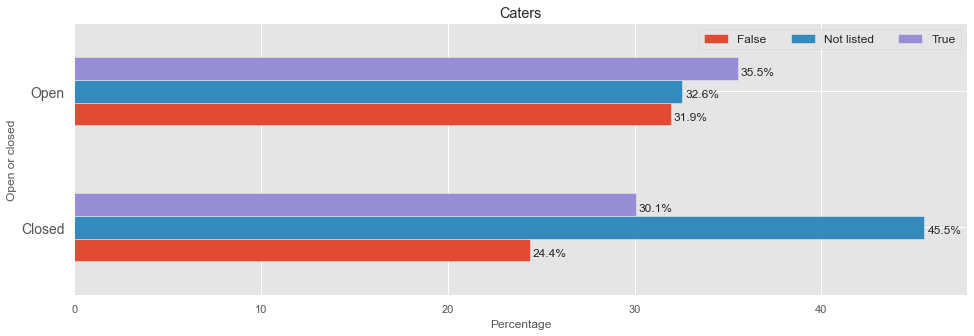

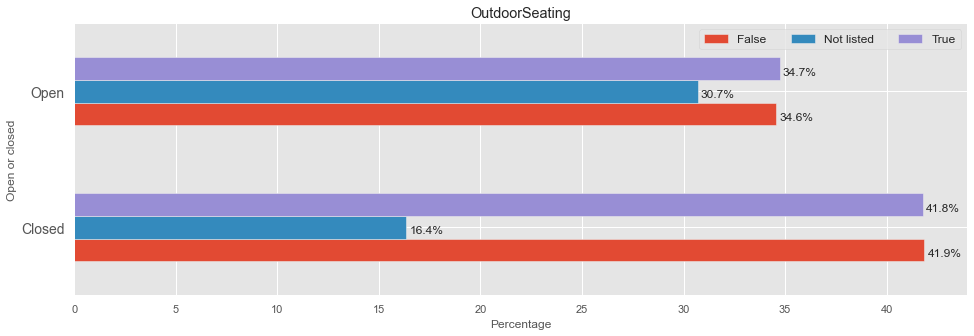

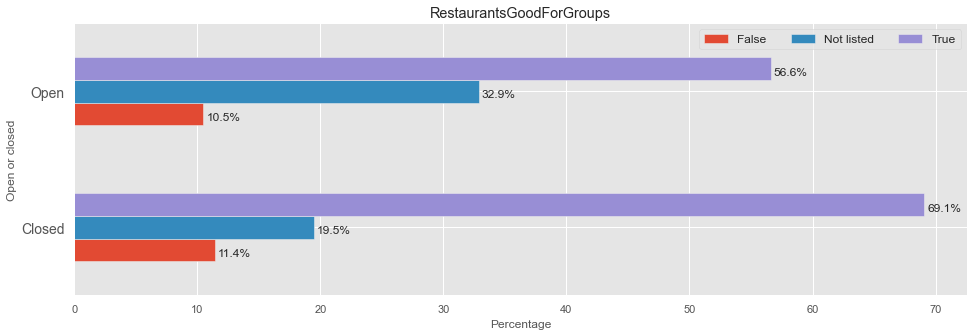

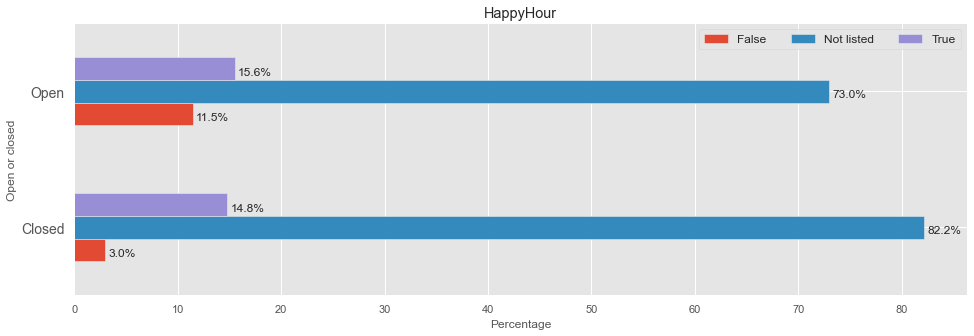

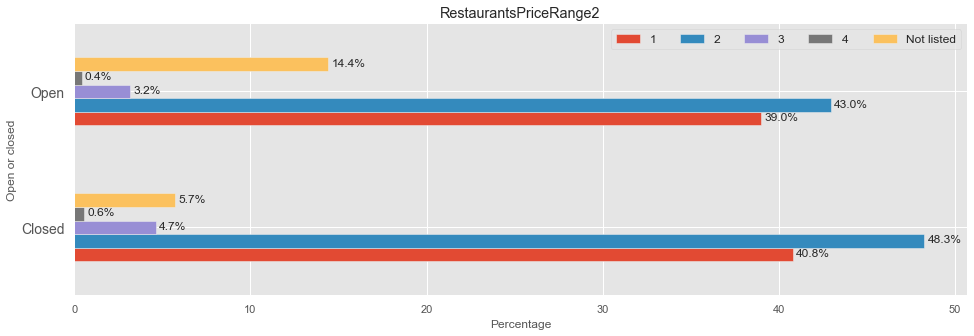

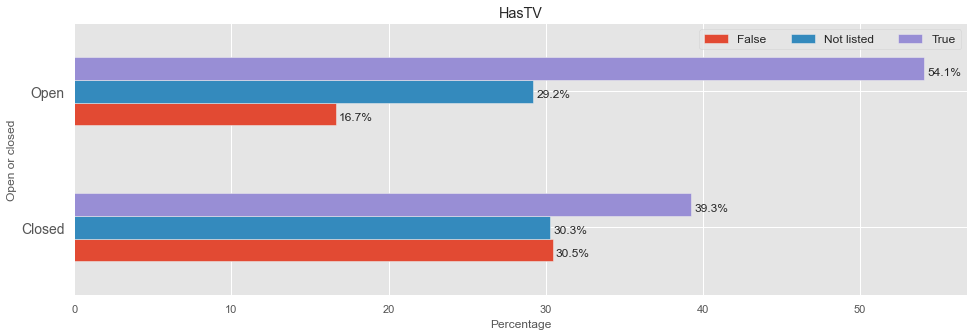

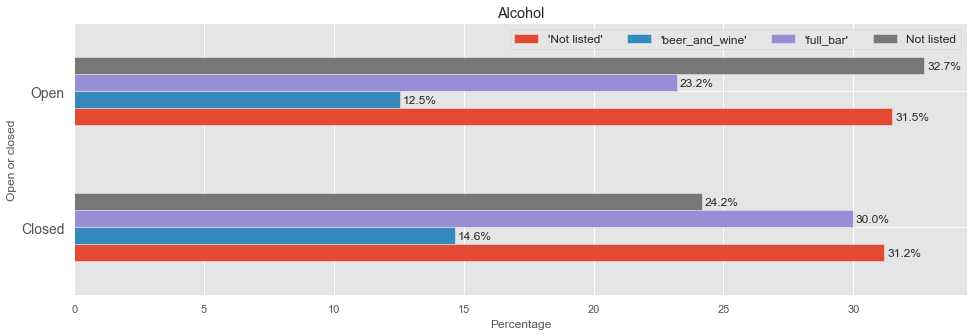

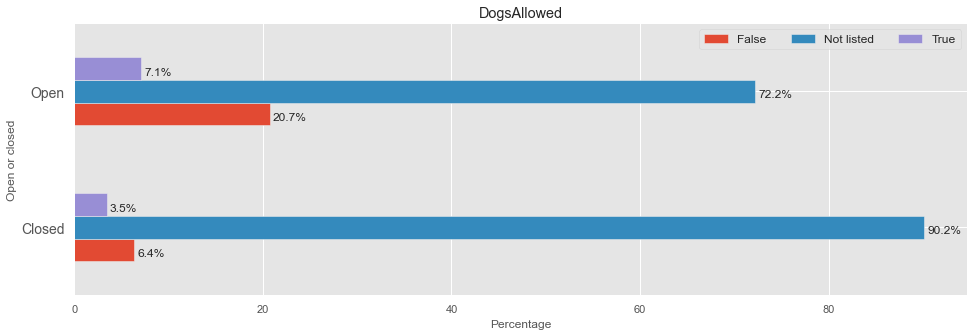

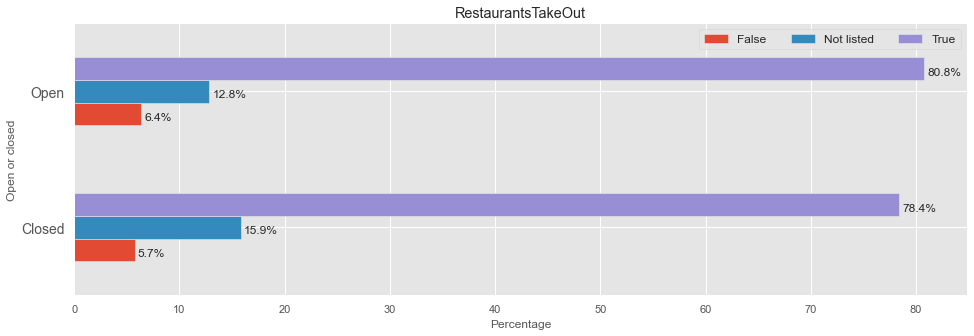

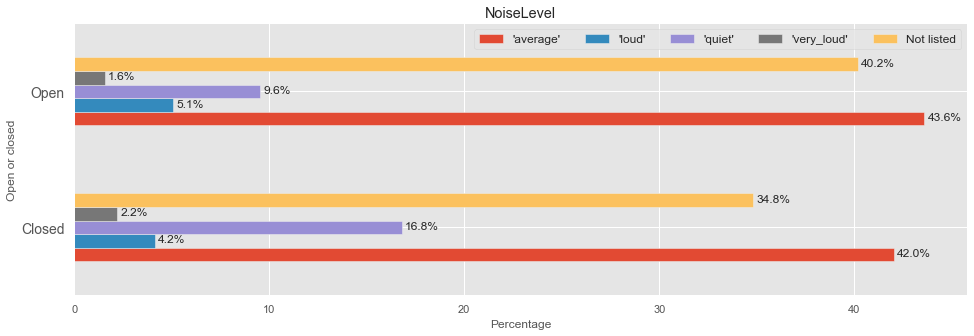

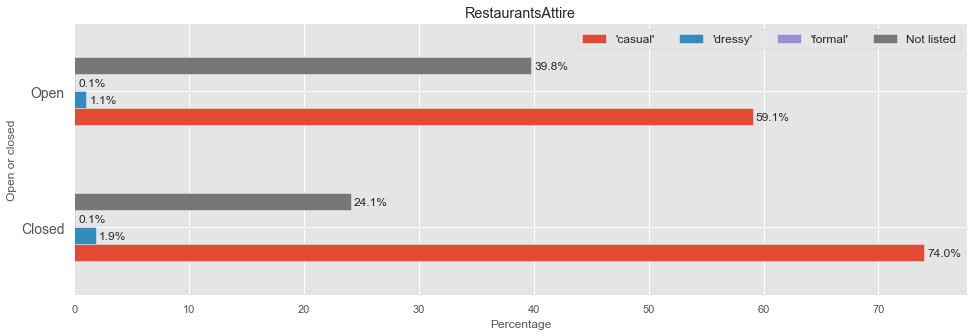

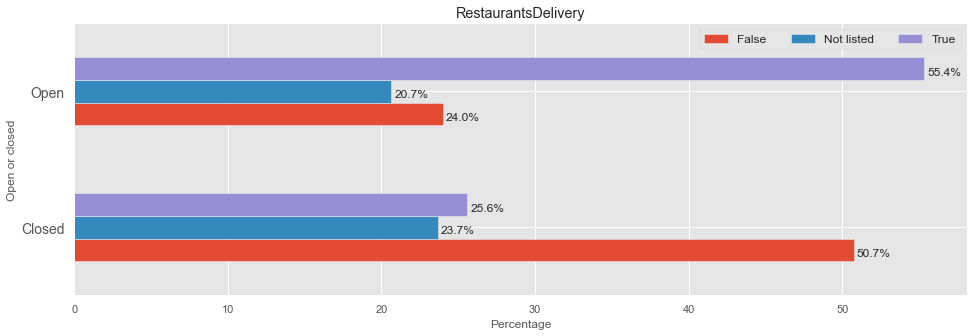

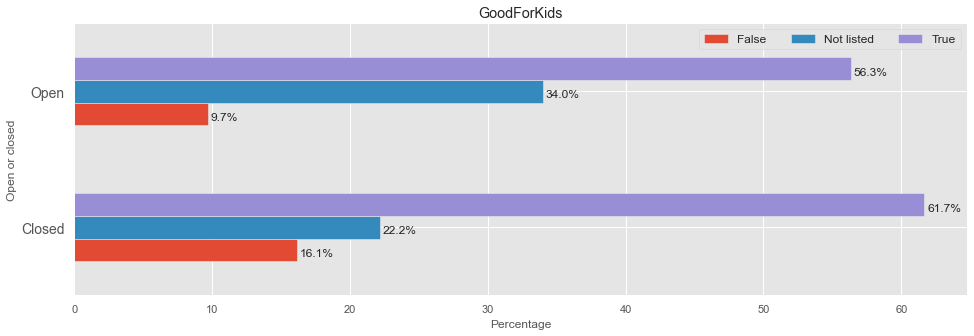

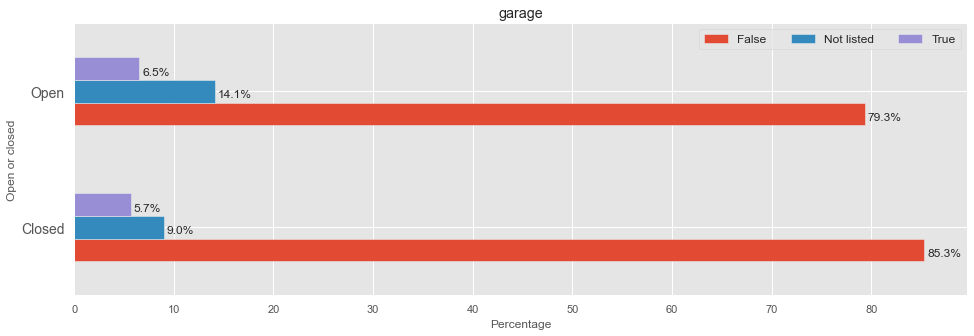

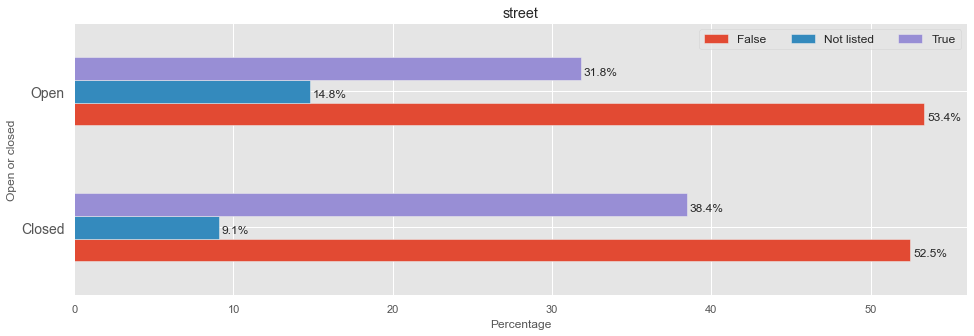

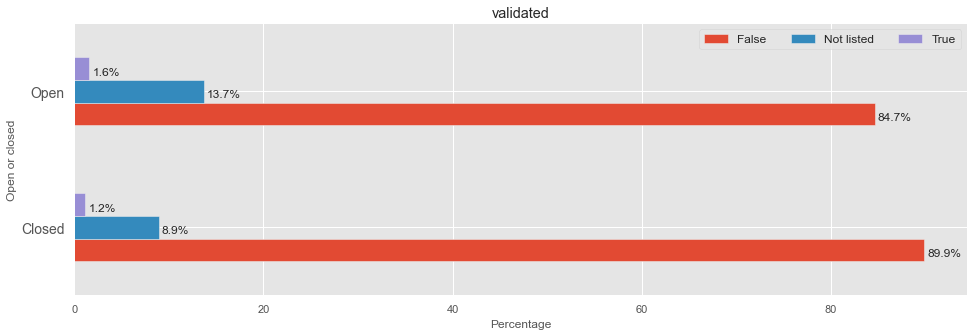

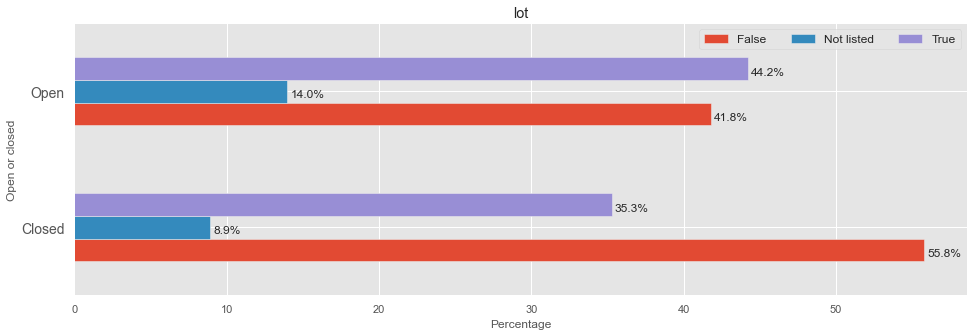

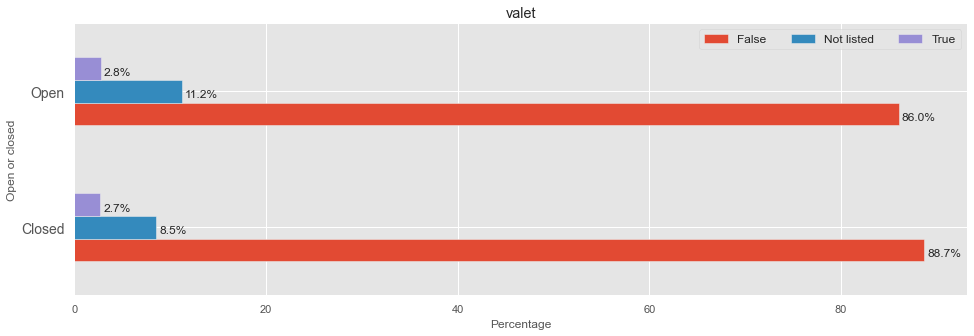

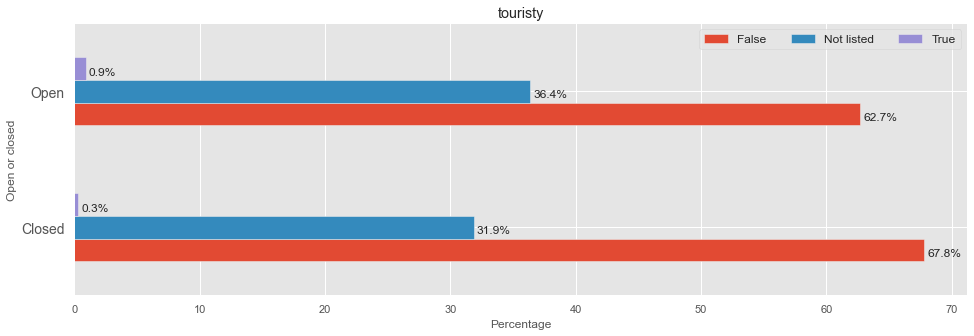

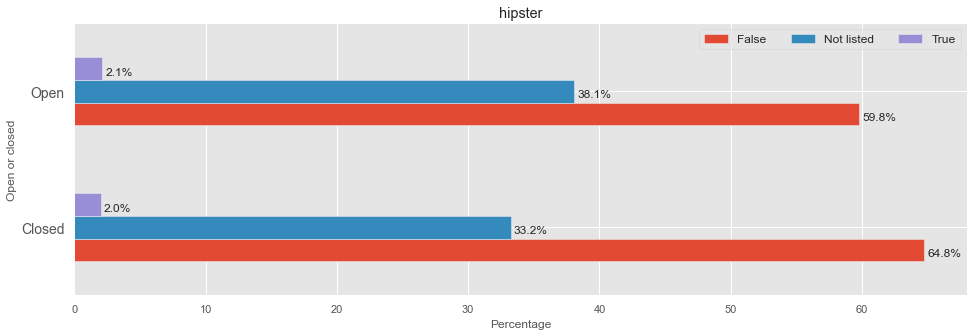

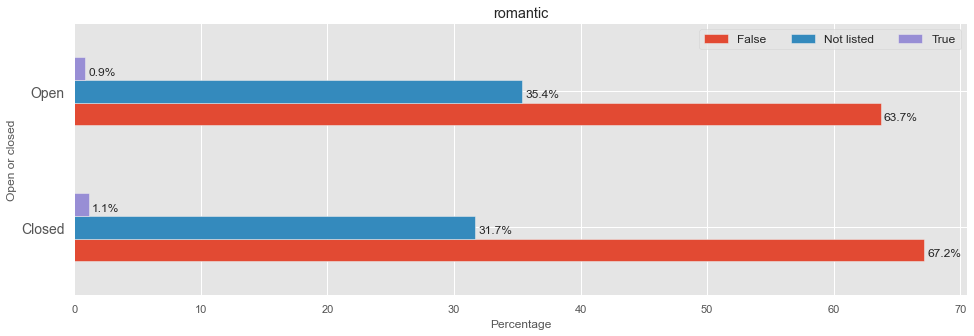

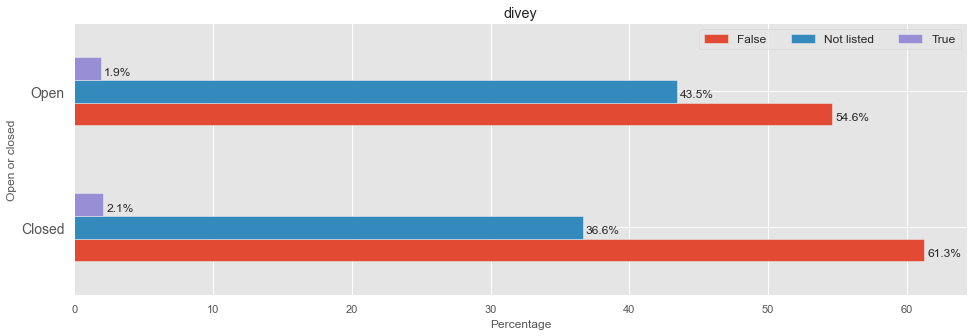

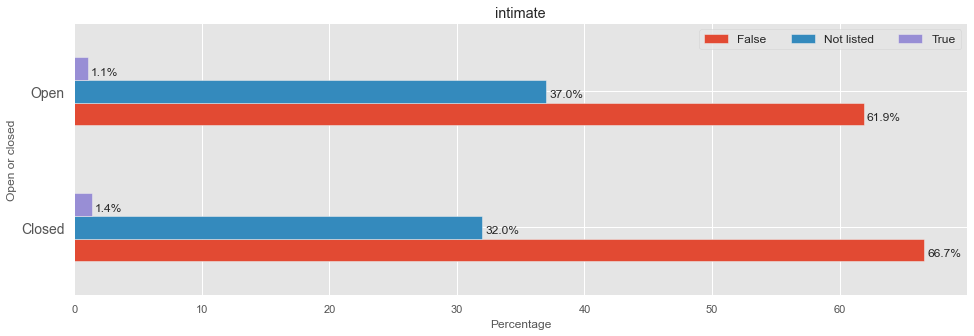

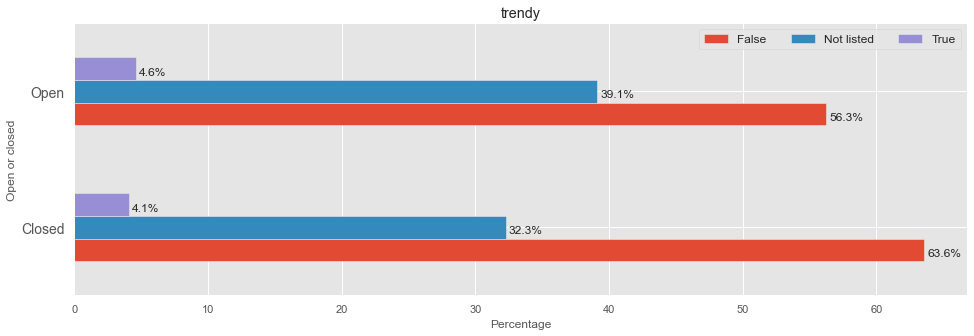

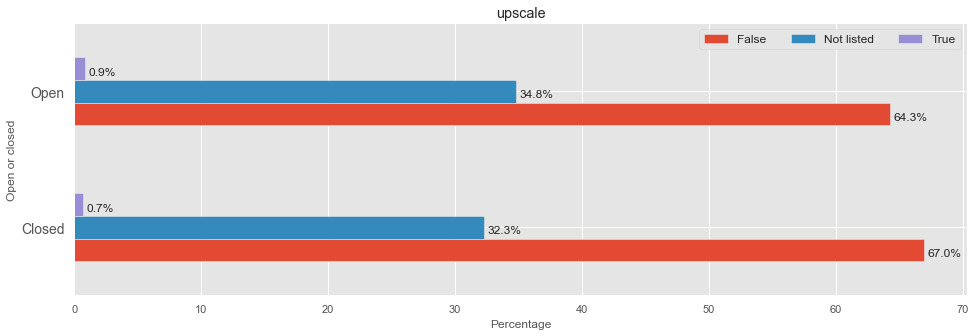

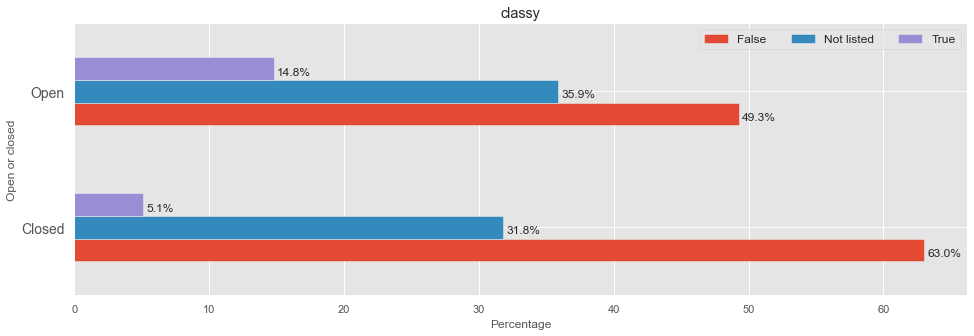

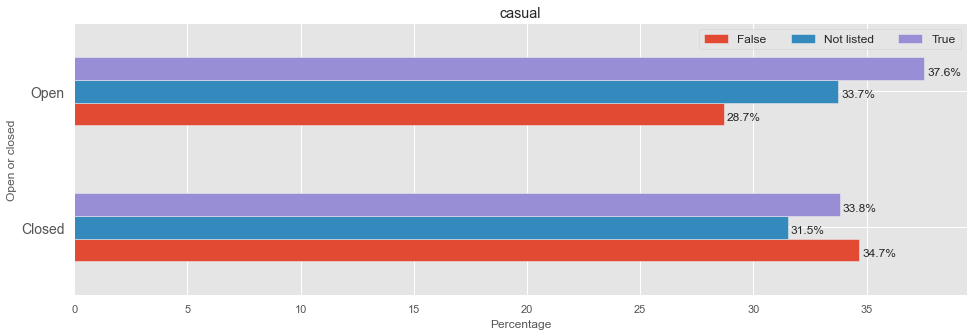

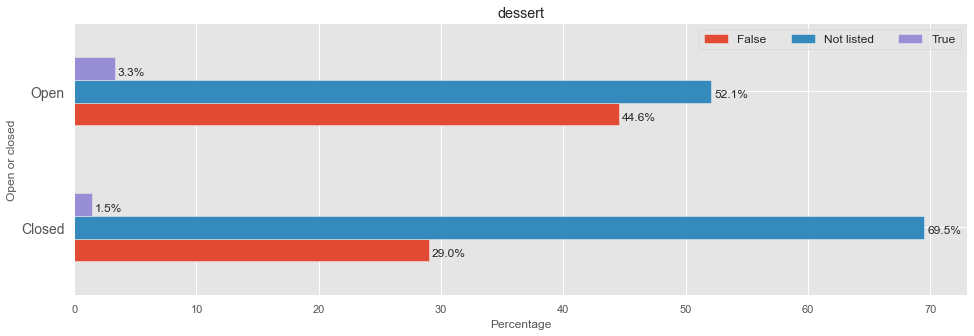

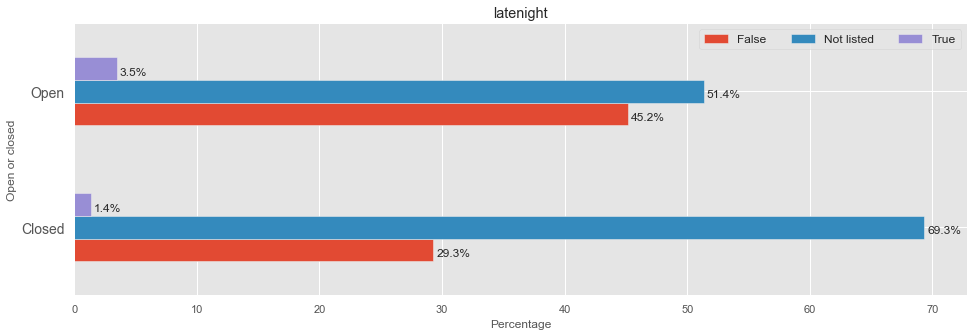

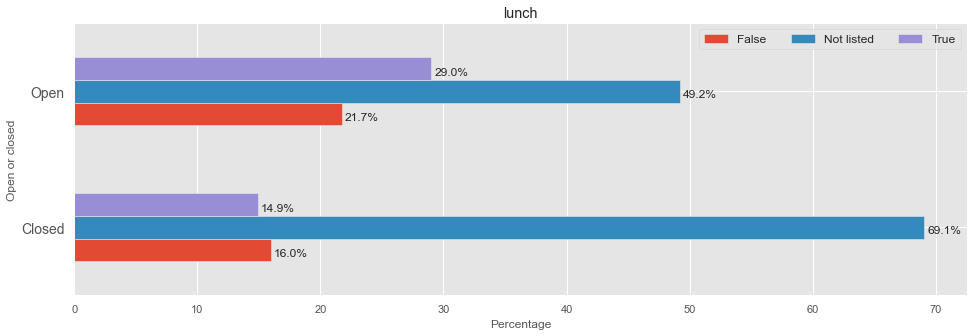

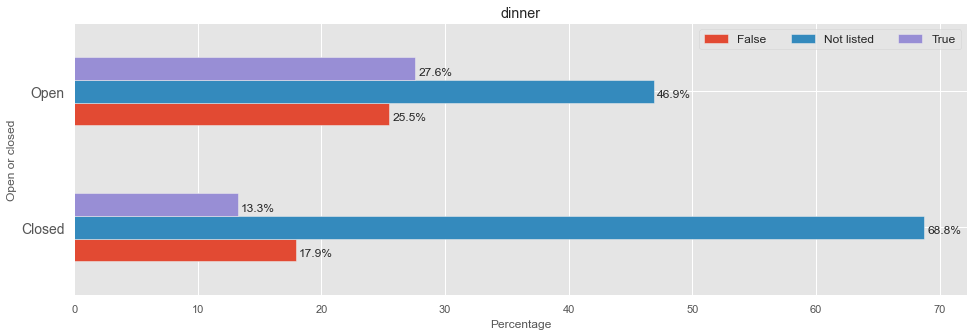

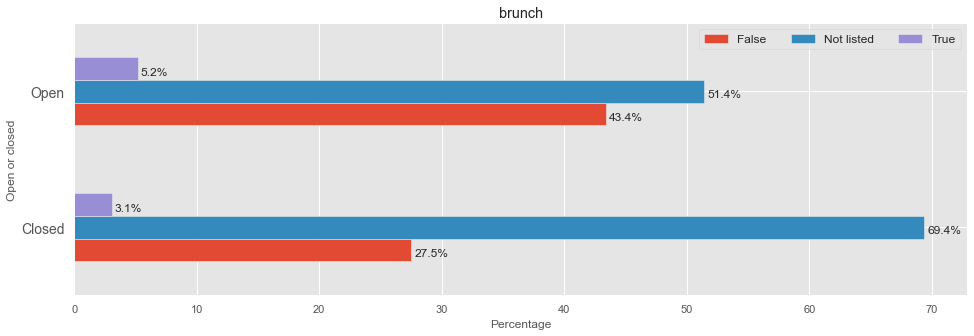

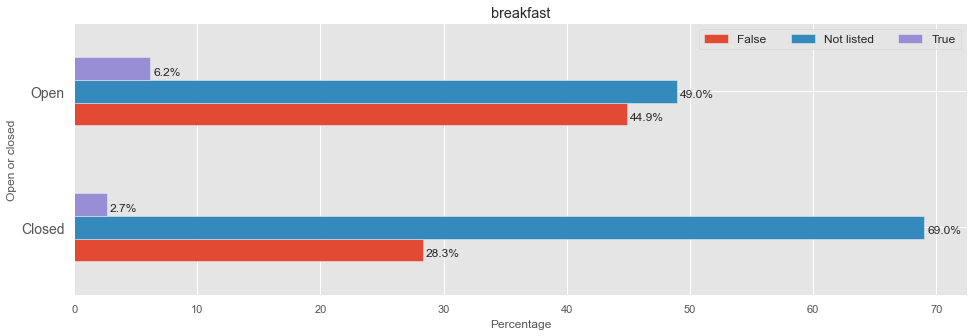

In [34]:
# Plot
for col in attribute_col:
    att_closed = (df_att_isclosed.groupby('is_open')[col].value_counts() / len(df_att_isclosed)) * 100
    att_open = (df_att_isopen.groupby('is_open')[col].value_counts() / len(df_att_isopen)) * 100
    att = att_closed.append(att_open).unstack()

    ax = att.plot(kind='barh', figsize=(16,5))
    for p in ax.patches:
        ax.annotate("%.1f" % p.get_width() + '%', (p.get_x() + p.get_width(), p.get_y()), xytext=(3, 5), textcoords='offset points', fontsize=12)
    ax.legend(loc=0, ncol=len(att.columns), fontsize=12)
    ax.set_xlabel('Percentage')
    ax.set_ylabel('Open or closed')
    title_string = col.replace('attributes.', '')
    ax.set_title(title_string)
    plt.yticks(fontsize=14)

    plt.show()